In [1]:
from PIL import Image 
from IPython.display import Image as print_image
import random
import json

In [2]:
# Each image is made up a series of traits
# The weightings for each trait drive the rarity and add up to 100%

background = ["Blue", "Orange", "Purple", "Red", "Yellow"] 
background_weights = [30, 40, 15, 5, 10]

circle = ["Blue", "Green", "Orange", "Red", "Yellow"] 
circle_weights = [30, 40, 15, 5, 10]

square = ["Blue", "Green", "Orange", "Red", "Yellow"] 
square_weights = [30, 40, 15, 5, 10]

# Dictionary variable for each trait. 
# Eech trait corresponds to its file name

background_files = {
    "Blue": "blue",
    "Orange": "orange",
    "Purple": "purple",
    "Red": "red",
    "Yellow": "yellow",
}

circle_files = {
    "Blue": "blue-circle",
    "Green": "green-circle",
    "Orange": "orange-circle",
    "Red": "red-circle",
    "Yellow": "yellow-circle"   
}

square_files = {
    "Blue": "blue-square",
    "Green": "green-square",
    "Orange": "orange-square",
    "Red": "red-square",
    "Yellow": "yellow-square" 
}

In [3]:
## Generate Traits

TOTAL_IMAGES = 10 # Number of random unique images we want to generate

all_images = [] 

# A recursive function to generate unique image combinations
def create_new_image():
    
    new_image = {}

    # For each trait category, select a random trait based on the weightings 
    new_image ["Background"] = random.choices(background, background_weights)[0]
    new_image ["Circle"] = random.choices(circle, circle_weights)[0]
    new_image ["Square"] = random.choices(square, square_weights)[0]
    
    if new_image in all_images:
        return create_new_image()
    else:
        return new_image
    
    
# Generate the unique combinations based on trait weightings
for i in range(TOTAL_IMAGES): 
    
    new_trait_image = create_new_image()
    
    all_images.append(new_trait_image)

In [4]:
# Returns true if all images are unique
def all_images_unique(all_images):
    seen = list()
    return not any(i in seen or seen.append(i) for i in all_images)

print("Are all images unique?", all_images_unique(all_images))

Are all images unique? True


In [5]:
# Add token Id to each image
i = 0
for item in all_images:
    item["tokenId"] = i
    i = i + 1

In [6]:
print(all_images)

[{'Background': 'Blue', 'Circle': 'Orange', 'Square': 'Blue', 'tokenId': 0}, {'Background': 'Orange', 'Circle': 'Yellow', 'Square': 'Blue', 'tokenId': 1}, {'Background': 'Red', 'Circle': 'Red', 'Square': 'Red', 'tokenId': 2}, {'Background': 'Orange', 'Circle': 'Yellow', 'Square': 'Yellow', 'tokenId': 3}, {'Background': 'Orange', 'Circle': 'Green', 'Square': 'Blue', 'tokenId': 4}, {'Background': 'Yellow', 'Circle': 'Blue', 'Square': 'Green', 'tokenId': 5}, {'Background': 'Yellow', 'Circle': 'Green', 'Square': 'Green', 'tokenId': 6}, {'Background': 'Orange', 'Circle': 'Orange', 'Square': 'Green', 'tokenId': 7}, {'Background': 'Purple', 'Circle': 'Green', 'Square': 'Blue', 'tokenId': 8}, {'Background': 'Blue', 'Circle': 'Blue', 'Square': 'Green', 'tokenId': 9}]


In [7]:
# Get Trait Counts
background_count = {}
for item in background:
    background_count[item] = 0
    
circle_count = {}
for item in circle:
    circle_count[item] = 0

square_count = {}
for item in square:
    square_count[item] = 0

for image in all_images:
    background_count[image["Background"]] += 1
    circle_count[image["Circle"]] += 1
    square_count[image["Square"]] += 1
    
print(background_count)
print(circle_count)
print(square_count)

{'Blue': 2, 'Orange': 4, 'Purple': 1, 'Red': 1, 'Yellow': 2}
{'Blue': 2, 'Green': 3, 'Orange': 2, 'Red': 1, 'Yellow': 2}
{'Blue': 4, 'Green': 4, 'Orange': 0, 'Red': 1, 'Yellow': 1}


In [8]:
#### Generate Metadata for all Traits 
METADATA_FILE_NAME = './metadata/all-traits.json'; 
with open(METADATA_FILE_NAME, 'w') as outfile:
    json.dump(all_images, outfile, indent=4)

In [9]:
#### Generate Images    
for item in all_images:
    
    im1 = Image.open(f'./trait-layers/backgrounds/{background_files[item["Background"]]}.jpg').convert('RGBA')
    im2 = Image.open(f'./trait-layers/circles/{circle_files[item["Circle"]]}.png').convert('RGBA')
    im3 = Image.open(f'./trait-layers/squares/{square_files[item["Square"]]}.png').convert('RGBA')

    #Create each composite
    com1 = Image.alpha_composite(im1, im2)
    com2 = Image.alpha_composite(com1, im3)

    #Convert to RGB
    rgb_im = com2.convert('RGB')
    file_name = str(item["tokenId"]) + ".png"
    rgb_im.save("./images/" + file_name)

In [10]:
#### Generate Metadata for each Image    

f = open('./metadata/all-traits.json') 
data = json.load(f)

def getAttribute(key, value):
    return {
        "trait_type": key,
        "value": value
    }
for i in data:
    token_id = i['tokenId']
    token = {
        "image": str(token_id) + '.png',
        "tokenId": token_id,
        "name": str(token_id),
        "attributes": []
    }
    token["attributes"].append(getAttribute("Background", i["Background"]))
    token["attributes"].append(getAttribute("Circle", i["Circle"]))
    token["attributes"].append(getAttribute("Square", i["Square"]))

    with open('./metadata/' + str(token_id) + '.json', 'w') as outfile:
        json.dump(token, outfile, indent=4)
f.close()

{'image': '0.png', 'tokenId': 0, 'name': '0', 'attributes': [{'trait_type': 'Background', 'value': 'Blue'}, {'trait_type': 'Circle', 'value': 'Orange'}, {'trait_type': 'Square', 'value': 'Blue'}]}


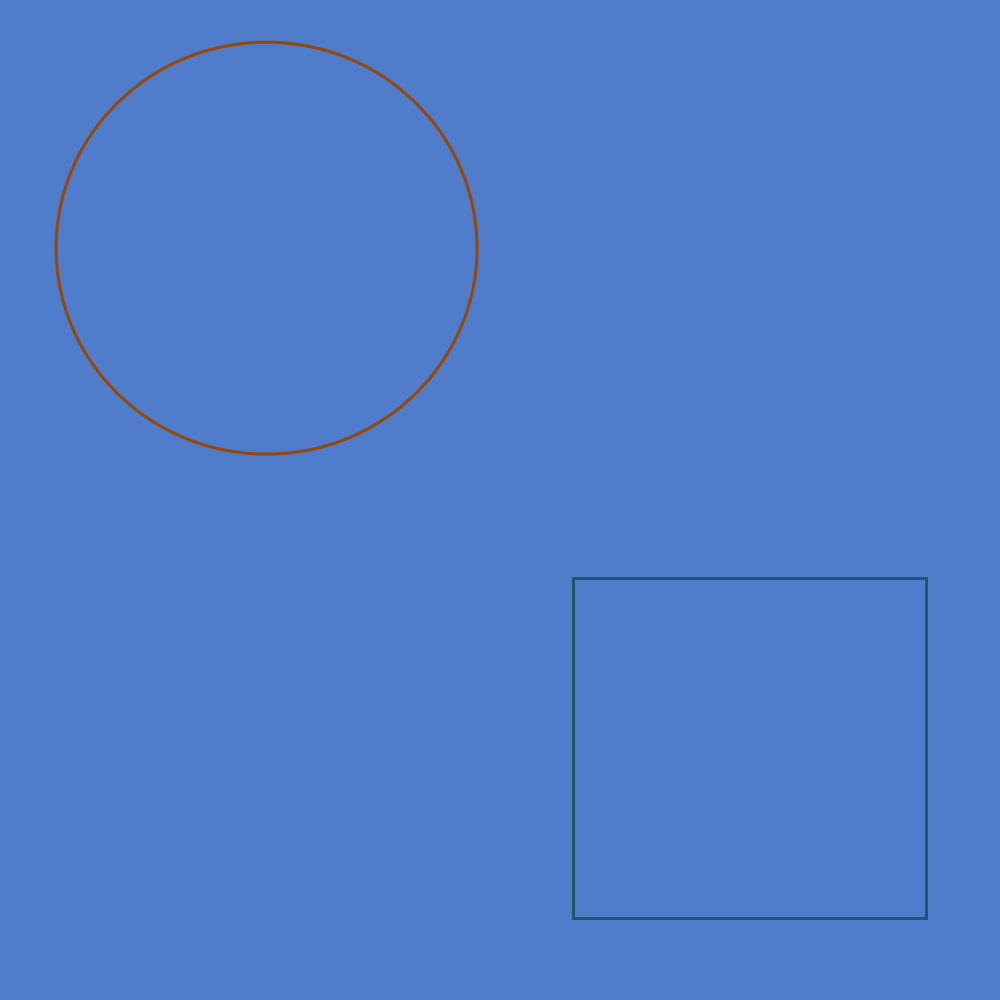

In [11]:
#### Print Example Image and Metadata
f = open('./metadata/0.json') 
example_metadata = json.load(f)
print(example_metadata)

example_image = print_image('./images/0.png')
example_image